ME200, Johannes Ruf and Luitgard Veraart

# Solutions to Assignment 5

## Exercise 23

We would like to sample from a target distribution which has corresponding probability density $f$. Suppose there is a density $g$ from which we know how to generate samples from and for which 

$$
f(x) \leq c g(x)  \quad \textrm{ for all } x \in  R, 
$$

for a constant $c$. 

Then, the *Von Neumann's acceptance-rejection algorithm* is given by 
* Generate $X$ from the density $g$. 
* Generate $U \sim {\rm Unif}(0, 1)$.
* If  $ U \leq \frac{f(X)}{cg(X)}$, then accept $X$ and return it. Otherwise, go back to step 1.

## Exercise 24

If $X$ is a standard normally distributed random variable then $Y = \sigma * X + \mu$ is $\mathcal{N}(\mu, \sigma^2)$-distribued.

## Exercise 25

Recall from the lecture notes that we reject a sample if

$$
U > e^{-\frac{(|X|-1)^2}{2}} ,
$$

where $U$ is uniformly distributed and $X$ is doubly exponentially distributed.

Let's first simulate doubly exponential samples as in Exercise 12, but now with a seeded random number generator:

In [15]:
import numpy as np

In [16]:
rng = np.random.default_rng(seed=998877)

In [17]:
sample_size = 100_000

In [18]:
normal_samples = []
for _ in range(sample_size):
    u = rng.random()
    
    y = rng.exponential()   
    du = rng.choice([-1, 1])
    cand = du * y
    
    while u > np.exp(-(abs(cand) - 1)**2 / 2):
        u = rng.random()

        y = rng.exponential()   
        du = rng.choice([-1, 1])
        cand = du * y
    normal_samples.append(cand)

In [19]:
import matplotlib.pyplot as plt

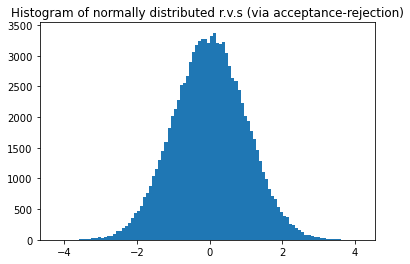

In [20]:
fig, ax = plt.subplots()
ax.hist(normal_samples, bins=100);
ax.set_title('Histogram of normally distributed r.v.s (via acceptance-rejection)');

## Exercise 26: Fibonacci, part II

In [21]:
import numpy as np

In [22]:
def fib2(k):
    numbers = np.array([1, 1])
    
    while numbers[-2] + numbers[-1] <= k:
        numbers = np.append(numbers, numbers[-1] + numbers[-2])
    return numbers

In [23]:
fib2(1000)

array([  1,   1,   2,   3,   5,   8,  13,  21,  34,  55,  89, 144, 233,
       377, 610, 987])

## Exercise 27: Box-Muller

In [24]:
import numpy as np

In [25]:
sample_size = 100_000

In [26]:
rng = np.random.default_rng(seed=12345)
u1 = rng.random(size=sample_size // 2)
u2 = rng.random(size=sample_size // 2)

r = - 2 * np.log(u1)    # exponentially distributed 
θ = 2 * np.pi * u2

x1 = np.sqrt(r) * np.cos(θ)
x2 = np.sqrt(r) * np.sin(θ)

samples = np.concatenate((x1, x2))

In [27]:
import matplotlib.pyplot as plt

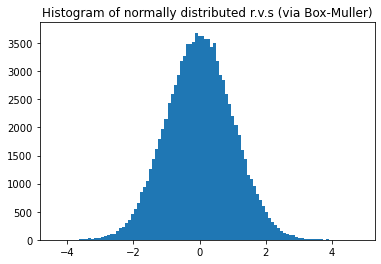

In [28]:
fig, ax = plt.subplots()
ax.hist(samples, bins=100);
ax.set_title('Histogram of normally distributed r.v.s (via Box-Muller)');